In [17]:
from skimage import io
from skimage.color import *
import numpy as np
import matplotlib.pyplot as plt
import numpy
import os

In [18]:
path = "d:/test2/"
def CollageCreate(in_file):
    filelist = os.listdir(path)
    result = []
    for file in filelist:
        if os.path.isfile(os.path.join(path, file)):
            if file.split('.')[1] in ('jpg', 'png'):
                result.append(os.path.join(path, file))
                
    im=[]
    for i in range(5):
        im.append(io.imread(result[i]))
    
    width,height,depth =im[0].shape
    insert = np.zeros([width,height*5,depth])
    
    imgray=[]
    for i in range(5):
        imgray.append(rgb2gray(im[i]))
    
    imhist=[]
    for i in range(5):
    #imgray.append(rgb2gray(im[i]))
        imhist.append(np.histogram(im[i].flatten(),256,normed= True)[0])

    stdhist=[]
    for i in range(5):
        stdhist.append(np.std(imhist[i]))
    
    s= sorted(stdhist)

    index=[]
    for i in range(5):
        for j in range(5):
            if stdhist[j]==s[i]:
                index.append(j)
                
    
    for iRow in range(width): # Loop corresponding to the rows
        for iCol in range(height): # Loop corresponding to the column
            for iDep in range(depth):
                insert[iRow,iCol,iDep] = im[index[3]][iRow,iCol,iDep]/255
                insert[iRow,iCol+height,iDep]=im[index[1]][iRow,iCol,iDep]/255
                insert[iRow,iCol+2*height,iDep]=im[index[0]][iRow,iCol,iDep]/255
                insert[iRow,iCol+3*height,iDep]=im[index[2]][iRow,iCol,iDep]/255
                insert[iRow,iCol+4*height,iDep]=im[index[4]][iRow,iCol,iDep]/255

    return insert

D:\anaconda3\lib\site-packages\ipykernel_launcher.py:24: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.


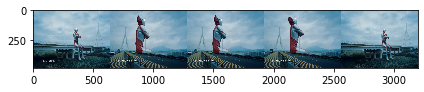

In [19]:
if __name__ == '__main__':
    # Read image
    insert= CollageCreate(path)
    io.imshow(insert)
    io.show()

----

In [15]:
    imgray=[]
    for i in range(5):
        imgray.append(rgb2gray(im[i]))
    
    imhist=[]
    for i in range(5):
    #imgray.append(rgb2gray(im[i]))
        imhist.append(np.histogram(im[i].flatten(),256,normed= True)[0])

    stdhist=[]
    for i in range(5):
        stdhist.append(np.std(imhist[i]))
    
    s= sorted(stdhist)

    index=[]
    for i in range(5):
        for j in range(5):
            if stdhist[j]==s[i]:
                index.append(j)

D:\anaconda3\lib\site-packages\ipykernel_launcher.py:8: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  


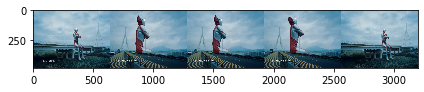

In [16]:

    for iRow in range(width): # Loop corresponding to the rows
        for iCol in range(height): # Loop corresponding to the column
            for iDep in range(depth):
                insert[iRow,iCol,iDep] = im[index[3]][iRow,iCol,iDep]/255
                insert[iRow,iCol+height,iDep]=im[index[1]][iRow,iCol,iDep]/255
                insert[iRow,iCol+2*height,iDep]=im[index[0]][iRow,iCol,iDep]/255
                insert[iRow,iCol+3*height,iDep]=im[index[2]][iRow,iCol,iDep]/255
                insert[iRow,iCol+4*height,iDep]=im[index[4]][iRow,iCol,iDep]/255

    io.imshow(insert)